### Ams House Price Prediction Project  
In this project you will work on developing an end-to-end machine learning project using linear regression, as this will be your first project in your machine learning journey. 
We will be doing extensive data visualization, we will perform data feature engineering, and we will also see how we can select features based on the correlation of the features.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
X = housing.data
y = housing.target

data = pd.DataFrame(X, columns = housing.feature_names)
data["SalePrice"] = y 
data.head()

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
print(housing.DESCR)

In [ ]:
print(data.shape) 

In [ ]:
data.info() 

In [ ]:
data.describe()

### EDA 

In [ ]:
data.isnull().sum()

In [ ]:
sns.distplot(data['SalePrice']);

In [ ]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['YearBuilt'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [ ]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

### Data Correlation
Relation between features

In [ ]:
# Check for infinite values and replace them with NaN
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, drop columns with NaN values if they are not needed for correlation
# Or fill NaN values, e.g., with the mean of the column
data_encoded.fillna(data_encoded.mean(), inplace=True)

# Calculate correlation again
cor = data_encoded.corr()

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])  # Only keep numeric columns

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.2] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

names.remove('SalePrice') # removing target feature 

print(names) # printing the features 
print(len(names))

### Model Building 

In [ ]:
from sklearn.model_selection import train_test_split 

X = data_encoded.drop("SalePrice", axis=1) 
y = data_encoded["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

In [ ]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test.values[0]) 
print("Model Predicted Value:- ", predictions[0])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

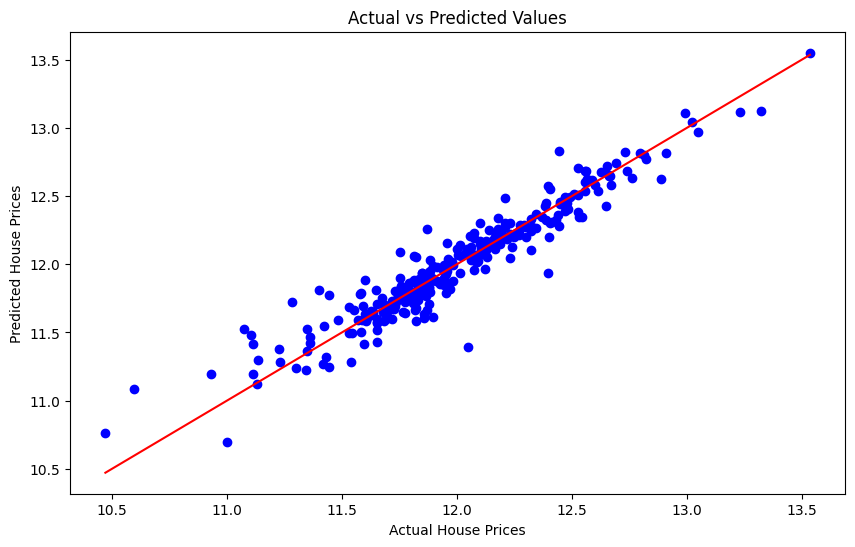

In [117]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, predictions, color='blue')  # Scatter plot of actual vs. predicted values
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.xlabel('Actual House Prices')  # X-axis label
plt.ylabel('Predicted House Prices')  # Y-axis label

# Plotting the identity line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line from the minimum to the maximum values

plt.show()